<a href="https://colab.research.google.com/github/MdShakil-Hossain/CSE-366-AI-Labs/blob/main/AI_Lab_4_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Artificila Neural Network (ANN)**
Implemented by Al Hossain
---



> Diabetes Dataset Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm

### Load Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE 366 Lab/Lab 4/diabetes.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.shape

(768, 9)

In [7]:
class_counts = df['Outcome'].value_counts()
print(class_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
df_cleaned = df.dropna()
print("Null values after cleaning:")
print(df_cleaned.isnull().sum())

Null values after cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Split the Dataset into Features and Labels


*   **Features:** (Independent variables) These are the input characteristics or attributes of the data points.
*   **Labels:** (Dependent Variables) These are the outcomes or target variables that we want to predict.



In [11]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [12]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


### Split the Dataset into Training and Testing Sets

*   **Training Set:** Used to teach the model the underlying patterns and relationships within the data.
*   **Test Set:** Evaluates the model's performance on data it hasn't seen before.



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(len(X_train))
print(len(X_test))

614
154


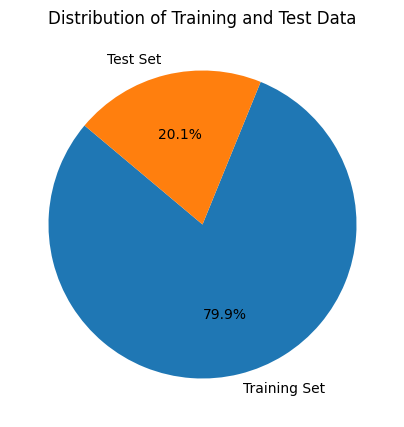

In [15]:
sizes = [len(X_train), len(X_test)]
labels = ['Training Set', 'Test Set']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Training and Test Data')
plt.show()

### ANN Model Design and Implementation

In [16]:
# Convert to tensor object
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
class ANN_model(nn.Module):
    # For ANN we will require input layer, hidden layer and output layer
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        # Inherit parent class i.e.nn.Module
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1, hidden2)
        self.out=nn.Linear(hidden2,out_features)
    # x will track the gradient descent and all the propogation
    def forward(self,x):
        # F we have all the activation functions
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [18]:
model = ANN_model()

In [19]:
print(model.parameters)

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>


### Model Training

In [20]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)

In [21]:
def train_model(model, X_train, y_train, epochs=10):
    loss_values = []

    for epoch in tqdm(range(epochs), desc='Training Epochs'):
        model.train()

        # Forward pass
        y_pred = model(X_train)

        # Compute loss
        loss = loss_function(y_pred, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())

        if (epoch + 1) == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    return loss_values

loss_values = train_model(model, X_train, y_train, epochs=1000)

Training Epochs: 100%|██████████| 1000/1000 [00:01<00:00, 594.27it/s]


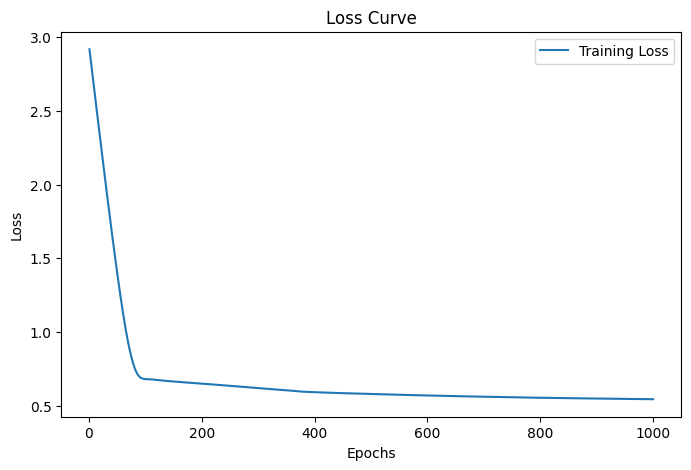

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

### Model Evaluation

In [23]:
def evaluate_model_with_class_accuracy(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)

        # Get predicted class labels
        _, predicted = torch.max(y_pred, 1)

        # Calculate overall accuracy
        accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
        print(f'Overall Accuracy: {accuracy:.4f}')

        # Generate and print classification report
        report = classification_report(y_test.numpy(), predicted.numpy(), target_names=class_names)
        print("\nClassification Report:\n", report)

        # Calculate per-class accuracy
        for i, class_name in enumerate(class_names):
            class_accuracy = accuracy_score(y_test.numpy()[y_test.numpy() == i], predicted.numpy()[y_test.numpy() == i])
            print(f'Accuracy for {class_name}: {class_accuracy:.4f}')

class_names = ['0', '1']
evaluate_model_with_class_accuracy(model, X_test, y_test)

Overall Accuracy: 0.6623

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        99
           1       0.54      0.36      0.43        55

    accuracy                           0.66       154
   macro avg       0.62      0.60      0.60       154
weighted avg       0.64      0.66      0.64       154

Accuracy for 0: 0.8283
Accuracy for 1: 0.3636


### Confusion Matrix

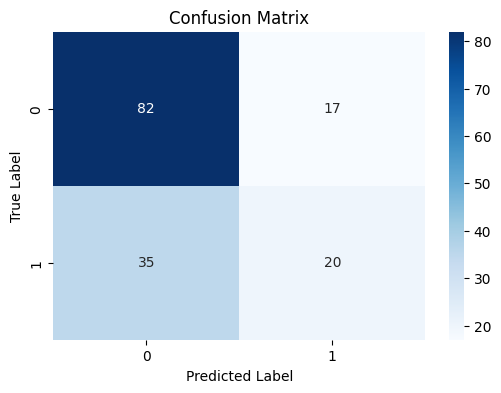

In [24]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

y_pred = model(X_test).argmax(dim=1).numpy()
plot_confusion_matrix(y_test.numpy(), y_pred, class_names)